In [1]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()

# 获取沪深A股历史K线数据
rs = bs.query_history_k_data_plus("sh.000300",
    "date,code,open,high,low,close,volume",
    start_date='2020-08-31', end_date='2021-09-01',
    frequency="d", adjustflag="3")

# 输出结果
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

# 结果集输出到csv文件
result.to_csv("zssh222.csv", index=False)
print(result)

# 退出系统
bs.logout()



login success!
           date       code       open       high        low      close  \
0    2020-08-31  sh.000300  4870.9337  4901.2115  4816.2123  4816.2153   
1    2020-09-01  sh.000300  4803.3922  4842.1350  4791.7829  4842.1223   
2    2020-09-02  sh.000300  4859.0754  4863.5509  4797.5204  4843.8870   
3    2020-09-03  sh.000300  4841.5020  4877.0117  4800.0577  4817.0952   
4    2020-09-04  sh.000300  4737.2368  4778.2030  4726.5559  4770.2190   
5    2020-09-07  sh.000300  4759.5213  4789.3031  4655.5600  4669.3677   
6    2020-09-08  sh.000300  4683.8256  4707.8966  4639.0531  4694.3894   
7    2020-09-09  sh.000300  4634.2470  4645.1972  4558.0304  4584.5887   
8    2020-09-10  sh.000300  4632.0994  4647.7505  4572.2058  4581.9775   
9    2020-09-11  sh.000300  4572.2572  4630.8842  4563.1061  4627.2826   
10   2020-09-14  sh.000300  4652.0539  4666.9862  4625.9877  4651.0507   
11   2020-09-15  sh.000300  4649.4472  4691.4997  4630.5374  4688.4826   
12   2020-09-16  sh.000

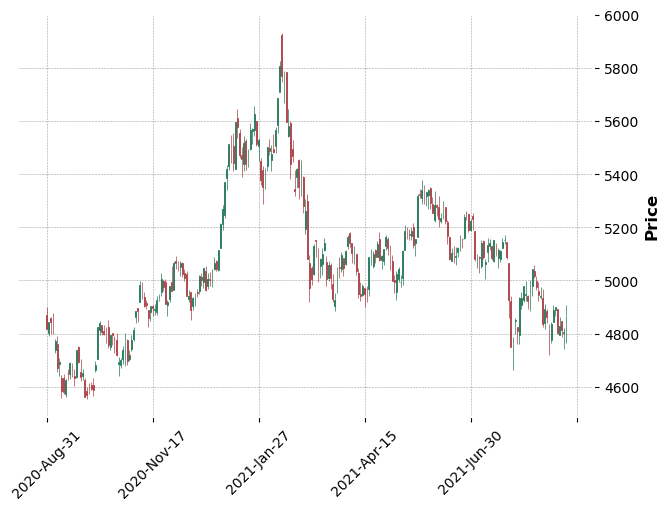

In [2]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf

# 读取刚刚保存的数据
daily = pd.read_csv('zssh.csv', index_col=0, parse_dates=True, usecols=[0, 2, 3, 4, 5])

mpf.plot(daily, type='candle', style='charles')  